In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "uniform_sampler"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.064550,0.050680,0.043073,0.041396,0.067280,0.018818,-0.088042,-0.014852,-0.060713,-0.001903,234.753713
1,-0.057970,-0.044642,-0.004676,-0.095680,-0.106450,0.126954,0.138791,0.013511,-0.027442,0.052453,57.458417
2,0.071353,0.050680,0.058430,-0.105354,0.127159,-0.042596,0.023552,0.182737,0.022813,0.098632,103.323069
3,-0.043229,0.050680,-0.061787,0.124296,-0.074467,0.008903,-0.097890,-0.070283,0.082419,-0.109428,196.811596
4,0.011078,-0.044642,0.161934,0.000609,0.073422,0.074781,0.057510,0.051108,0.063475,-0.019023,68.908679
5,0.055776,-0.044642,-0.050931,-0.054116,0.027092,0.008523,-0.088742,0.093699,-0.034657,-0.032672,319.306796
6,-0.000087,-0.044642,-0.086020,-0.018042,-0.032783,-0.024145,0.076471,0.058787,0.063043,-0.083192,186.374532
7,0.027835,-0.044642,-0.007529,0.120966,-0.078527,0.009725,0.065918,0.071724,0.010120,-0.006205,166.090231
8,0.015465,-0.044642,0.043738,0.052459,0.094420,0.057233,0.077509,-0.053830,-0.116475,0.077175,270.925207
9,-0.058173,0.050680,0.041981,-0.062865,0.084689,0.160216,0.063519,0.160535,0.020730,0.126918,110.293547


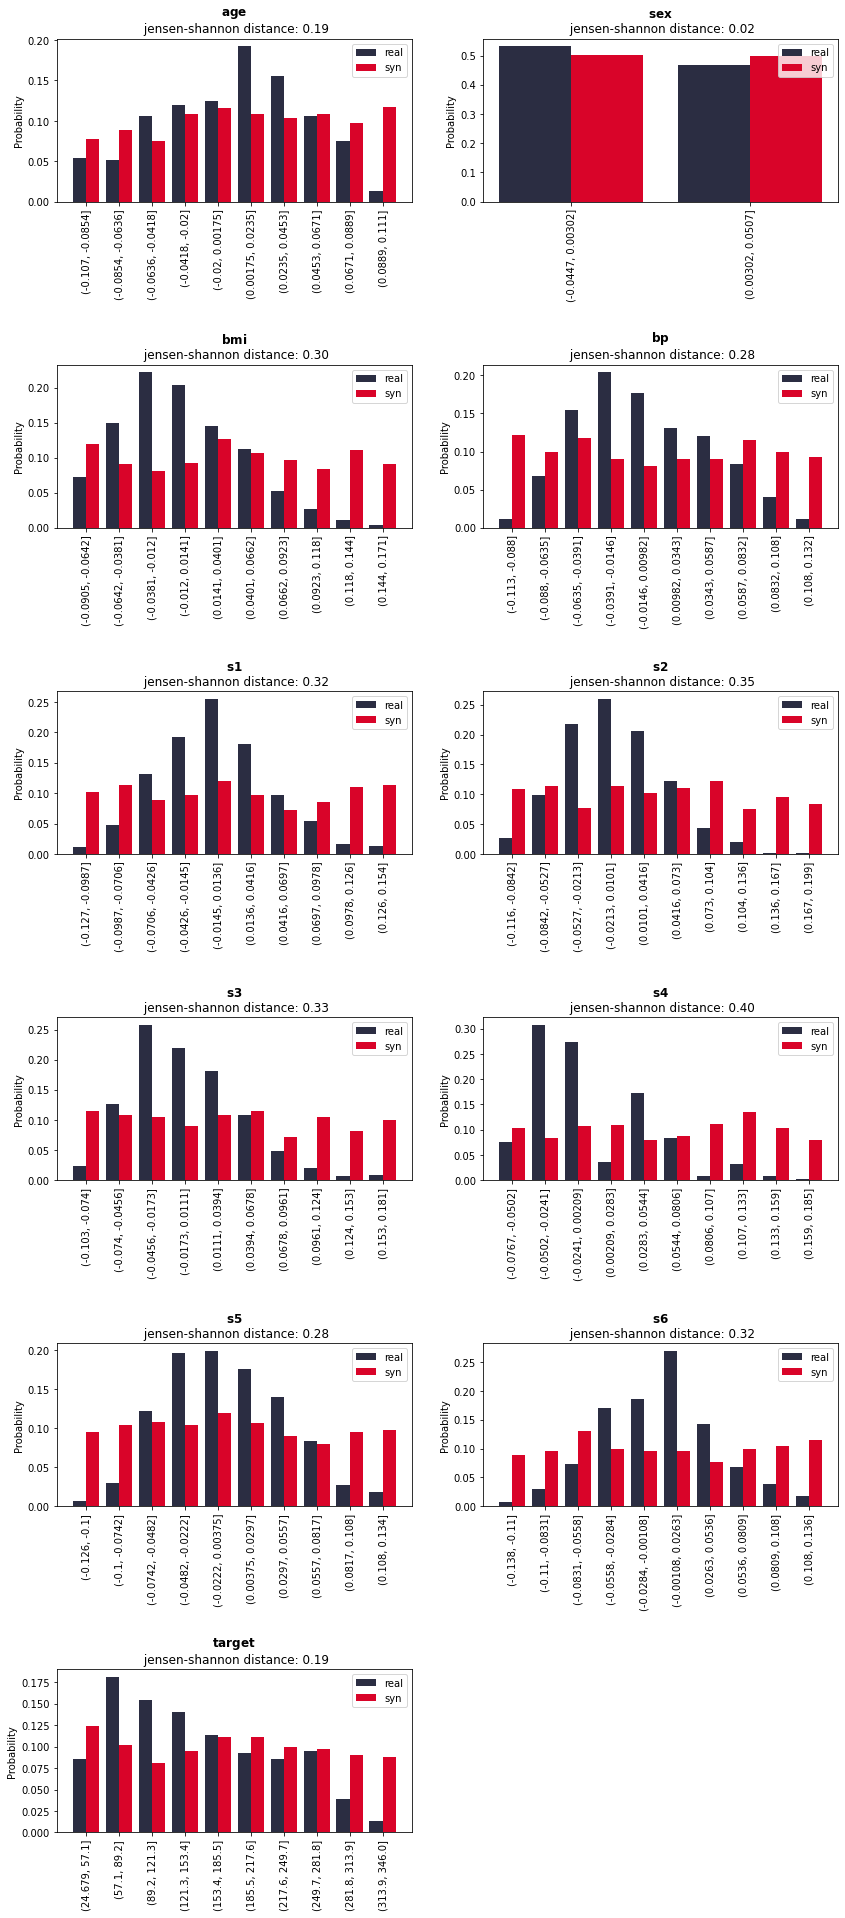

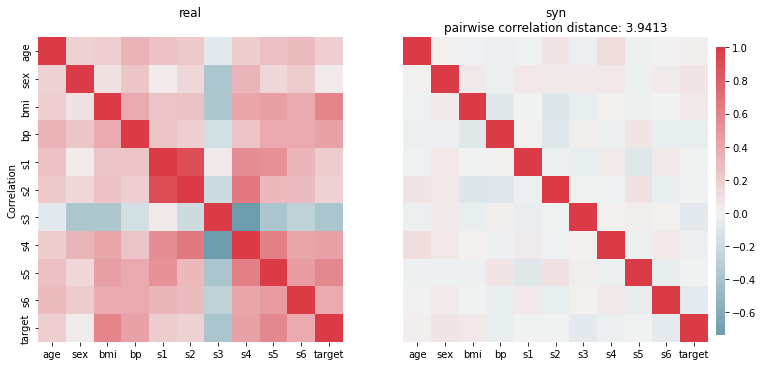

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : uniform_sampler


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.01
sanity.avg_distance_nearest_neighbor,0.134869,0.231072,0.196821,0.043888,0.224522,0.048102,3,0,0.01
sanity.inlier_probability,0.590498,0.782805,0.667421,0.083086,0.628959,0.096154,3,0,0.01
sanity.outlier_probability,0.006787,0.024887,0.015837,0.007389,0.015837,0.00905,3,0,0.01
statistical.inverse_kl_divergence,0.768163,0.778212,0.774138,0.004317,0.776037,0.005024,3,0,0.02
statistical.kolmogorov_smirnov_test,0.756684,0.763266,0.760798,0.002928,0.762443,0.003291,3,0,0.01
statistical.chi_squared_test,0.995545,0.996395,0.995931,0.000351,0.995854,0.000425,3,0,0.02
statistical.maximum_mean_discrepancy,0.005785,0.006095,0.005953,0.000128,0.005978,0.000155,3,0,0.03
statistical.inverse_cdf_distance,1.427625,1.523458,1.480475,0.039741,1.490343,0.047916,3,0,6.79
